# Clusterização utilizando KMeans - Python

### Utilizando bibliotecas padrão do python.

# Importando bibliotecas utilizadas para a análise

In [281]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline

# Impotando o conjunto de dados

In [282]:
df_diabetes = pd.read_csv('diabetes.csv')


#Deletando a coluna "Classe"
df_noclass = df_diabetes.drop('Classe', axis=1)
df_noclass.head()

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Normalizando os valores entre 0 e 1

In [283]:
nomes = df_diabetes_noclass.columns
valores = df_diabetes_noclass.values
escala_min_max = preprocessing.MinMaxScaler()
valores_normalizados = escala_min_max.fit_transform(valores)
df_diabetes_normalizado = pd.DataFrame(valores_normalizados)
df_diabetes_normalizado.columns = nomes
df_diabetes_normalizado.head(5)

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Implementando método Elbow

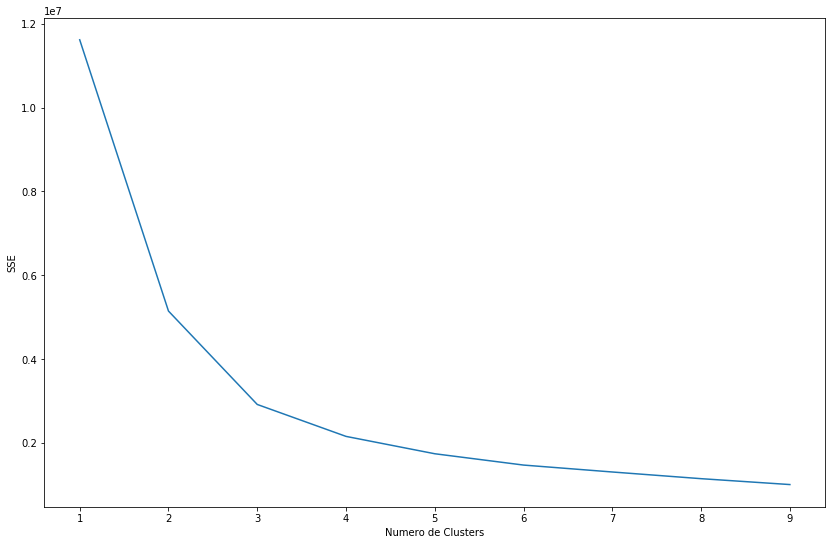

In [284]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(valores)
    df_diabetes_normalizado["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(14,9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de Clusters")
plt.ylabel("SSE")
plt.show()

# Encontrando o valor ótimo de k

In [340]:
X = df_diabetes_normalizado
y = df_diabetes_normalizado['clusters']

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("Para n_clusters={}, O Coeficiente de silueta é {}".format(n_cluster, sil_coeff))
    
df_diabetes_normalizado['Classe'] = df_diabetes['Classe']

Para n_clusters=2, O Coeficiente de silueta é 0.5778356485081754
Para n_clusters=3, O Coeficiente de silueta é 0.6320229174335315
Para n_clusters=4, O Coeficiente de silueta é 0.6316561261427619
Para n_clusters=5, O Coeficiente de silueta é 0.6140103253269055
Para n_clusters=6, O Coeficiente de silueta é 0.5926124623646992
Para n_clusters=7, O Coeficiente de silueta é 0.582908345223159
Para n_clusters=8, O Coeficiente de silueta é 0.5938260306296376
Para n_clusters=9, O Coeficiente de silueta é 0.5004706881533308
Para n_clusters=10, O Coeficiente de silueta é 0.4586049862624324


# Definindo o numero de clusters para a função KMeans

In [286]:
kmeans = KMeans(n_clusters=2)

# Executando o aprendizado com a variavel definida anteriormente 'kmeans'

In [309]:
kmeans.fit(dfa.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Verificando os centroides

In [326]:
kmeans.cluster_centers_

array([[ 1.22558538e-01,  5.79538469e-01,  5.40904027e-01,
         2.20398156e-01,  1.00495765e-01,  4.73549115e-01,
         1.67712436e-01,  9.62135922e-02, -9.43689571e-16],
       [ 4.37107649e-01,  6.64448726e-01,  6.18415085e-01,
         1.81059608e-01,  8.17658547e-02,  4.83385661e-01,
         1.69130131e-01,  4.23451910e-01,  1.00000000e+00]])

# Vizualizando os 'labels' ou 'classes' criado pelo algoritimo

In [311]:
kmeans.labels_

# Definindo uma coluna no dataframe 'Classe Algoritimo' para destinça6o da original.

In [328]:
dfa['Classe Algoritimo'] = kmeans.labels_

dfa.head()

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade,Classe Algoritimo
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0


# Plotando os graficos de dispersão para comparar as classes originais com as geradas pelo algoritimo.

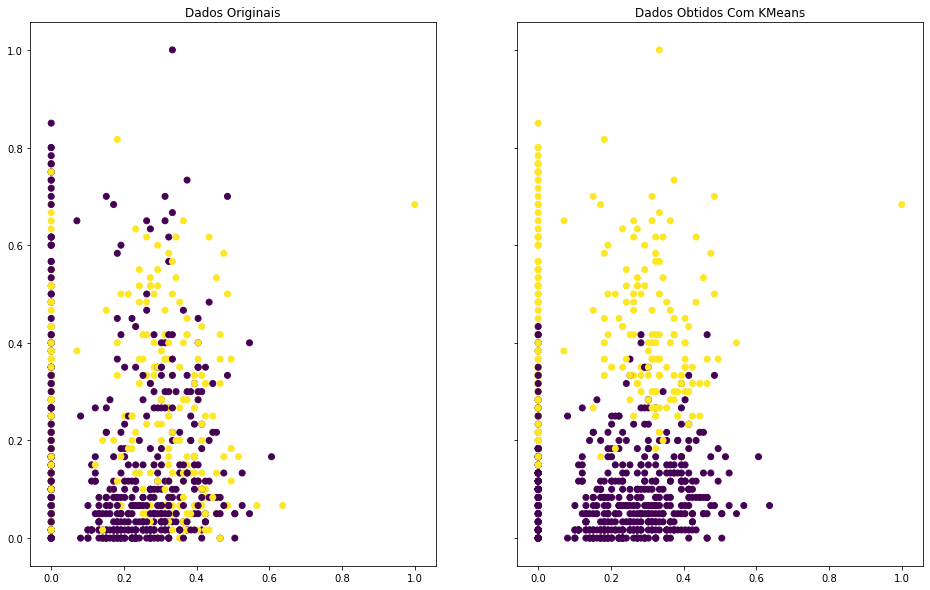

In [357]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,10))
ax1.set_title('Dados Originais')
ax1.scatter(data=df_diabetes_normalizado, x='Triceps', y='Idade', c='Classe')

ax2.set_title('Dados Obtidos Com KMeans')
ax2.scatter(data=dfa, x='Triceps', y='Idade', c='Classe Algoritimo')